In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics #for confusion matrix
from sklearn.model_selection import train_test_split #for splitting data

In [3]:
df = pd.read_csv('cleaned_data.csv')

In [4]:
#chi2 feature selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
scaler = MinMaxScaler()
X = df.drop('churn',axis=1)
y = df['churn']
X_scaled = scaler.fit_transform(X)
chi_scores = chi2(X_scaled,y)
chi2_scores = pd.Series(chi_scores[0], index=X.columns)
chi2_scores.sort_values(ascending=False, inplace=True)
print(chi2_scores)

country_Germany           225.464426
IsActiveWithoutbalance    133.682426
active_member             118.199414
age                       101.998366
low_credit_score           58.637703
country_France             54.923705
gender                     51.539926
balance                    28.502819
IsActiveWithbalance        23.899650
country_Spain              20.867206
vip_customer                7.610183
products_number             4.863425
InactiveWithoutbalance      4.393119
credit_score                0.522156
tenure                      0.327054
estimated_salary            0.241805
credit_card                 0.150041
is_Elderly                  0.000283
dtype: float64


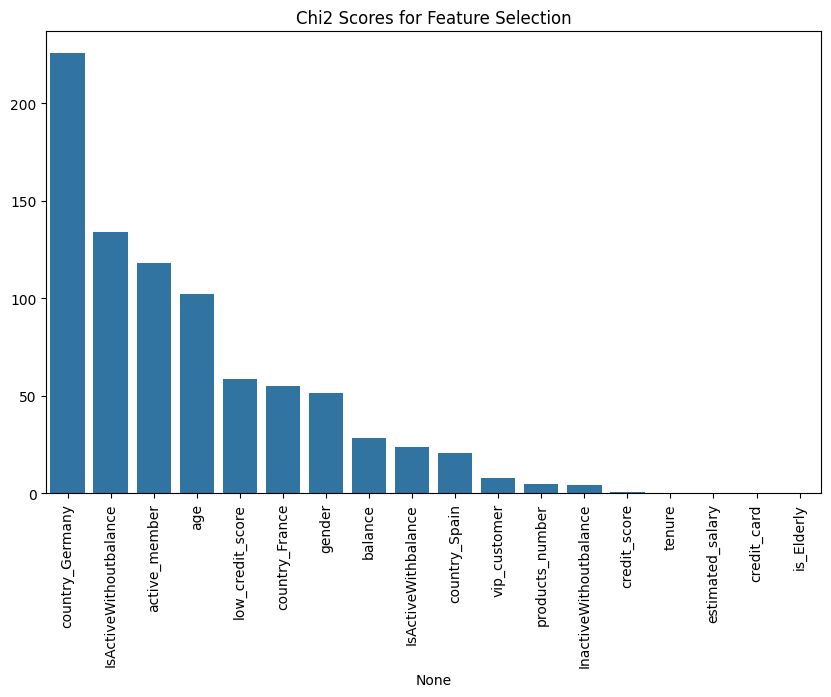

In [5]:
#plot chi2 scores
plt.figure(figsize=(10,6))
sns.barplot(x=chi2_scores.index, y=chi2_scores.values)
plt.xticks(rotation=90)
plt.title('Chi2 Scores for Feature Selection')
plt.show()

In [6]:
#important features based on chi2 scores
important_features = chi2_scores[chi2_scores > 4]
print(important_features)

country_Germany           225.464426
IsActiveWithoutbalance    133.682426
active_member             118.199414
age                       101.998366
low_credit_score           58.637703
country_France             54.923705
gender                     51.539926
balance                    28.502819
IsActiveWithbalance        23.899650
country_Spain              20.867206
vip_customer                7.610183
products_number             4.863425
InactiveWithoutbalance      4.393119
dtype: float64


In [7]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, y, random_state=42)
mutual_info_scores = pd.Series(mutual_info, index=X.columns)
mutual_info_scores.sort_values(ascending=False, inplace=True)
print(mutual_info_scores.head(13))

products_number           0.070315
age                       0.067298
active_member             0.012672
gender                    0.012096
country_France            0.011775
country_Germany           0.011208
balance                   0.007755
IsActiveWithoutbalance    0.006793
tenure                    0.005286
low_credit_score          0.004637
credit_card               0.003969
estimated_salary          0.002704
IsActiveWithbalance       0.001525
dtype: float64


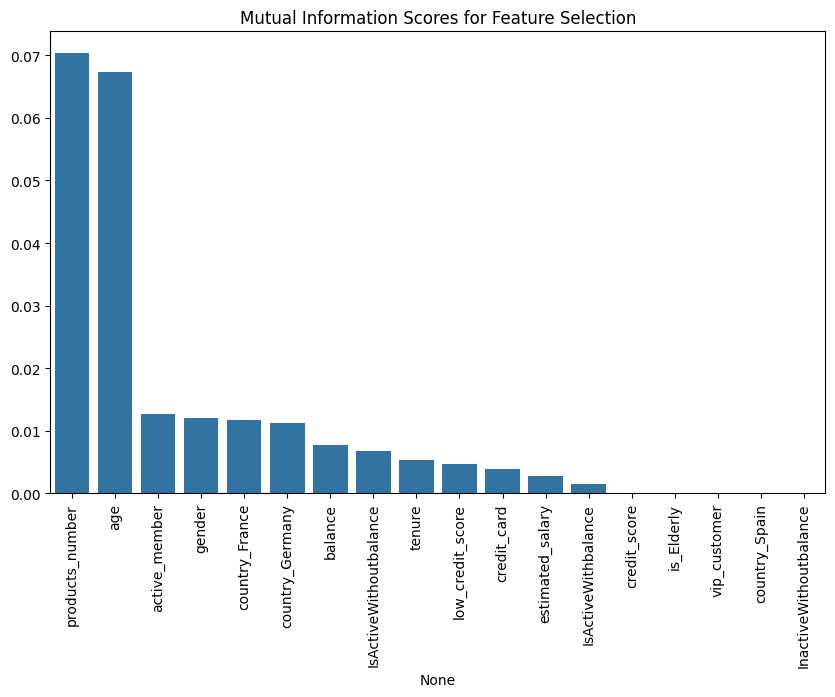

In [8]:
#plot feature importance based on mutual information
plt.figure(figsize=(10,6)) 
sns.barplot(x=mutual_info_scores.index, y=mutual_info_scores.values)
plt.xticks(rotation=90)
plt.title('Mutual Information Scores for Feature Selection')
plt.show()

In [9]:
#important features based on mutual information
important_features_mi = mutual_info_scores[mutual_info_scores > 0.001524]
print(important_features_mi)

products_number           0.070315
age                       0.067298
active_member             0.012672
gender                    0.012096
country_France            0.011775
country_Germany           0.011208
balance                   0.007755
IsActiveWithoutbalance    0.006793
tenure                    0.005286
low_credit_score          0.004637
credit_card               0.003969
estimated_salary          0.002704
IsActiveWithbalance       0.001525
dtype: float64


In [11]:
#Desision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report

tree = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight='balanced')
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1607
           1       0.44      0.77      0.56       393

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.76      0.78      2000



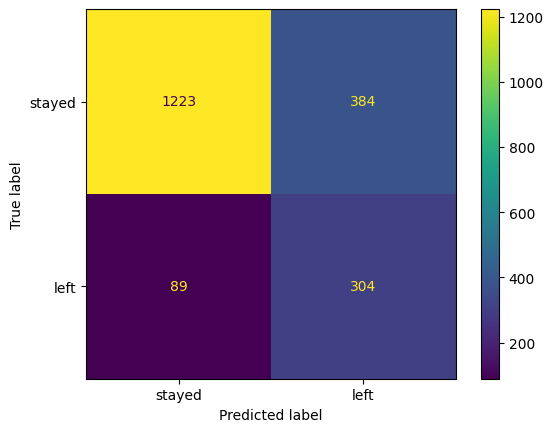

In [12]:
#confusion matrix
actual = y_test
predited = y_pred
confusion_mtx = metrics.confusion_matrix(actual, predited)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,display_labels=['stayed','left'])
cm_display.plot()

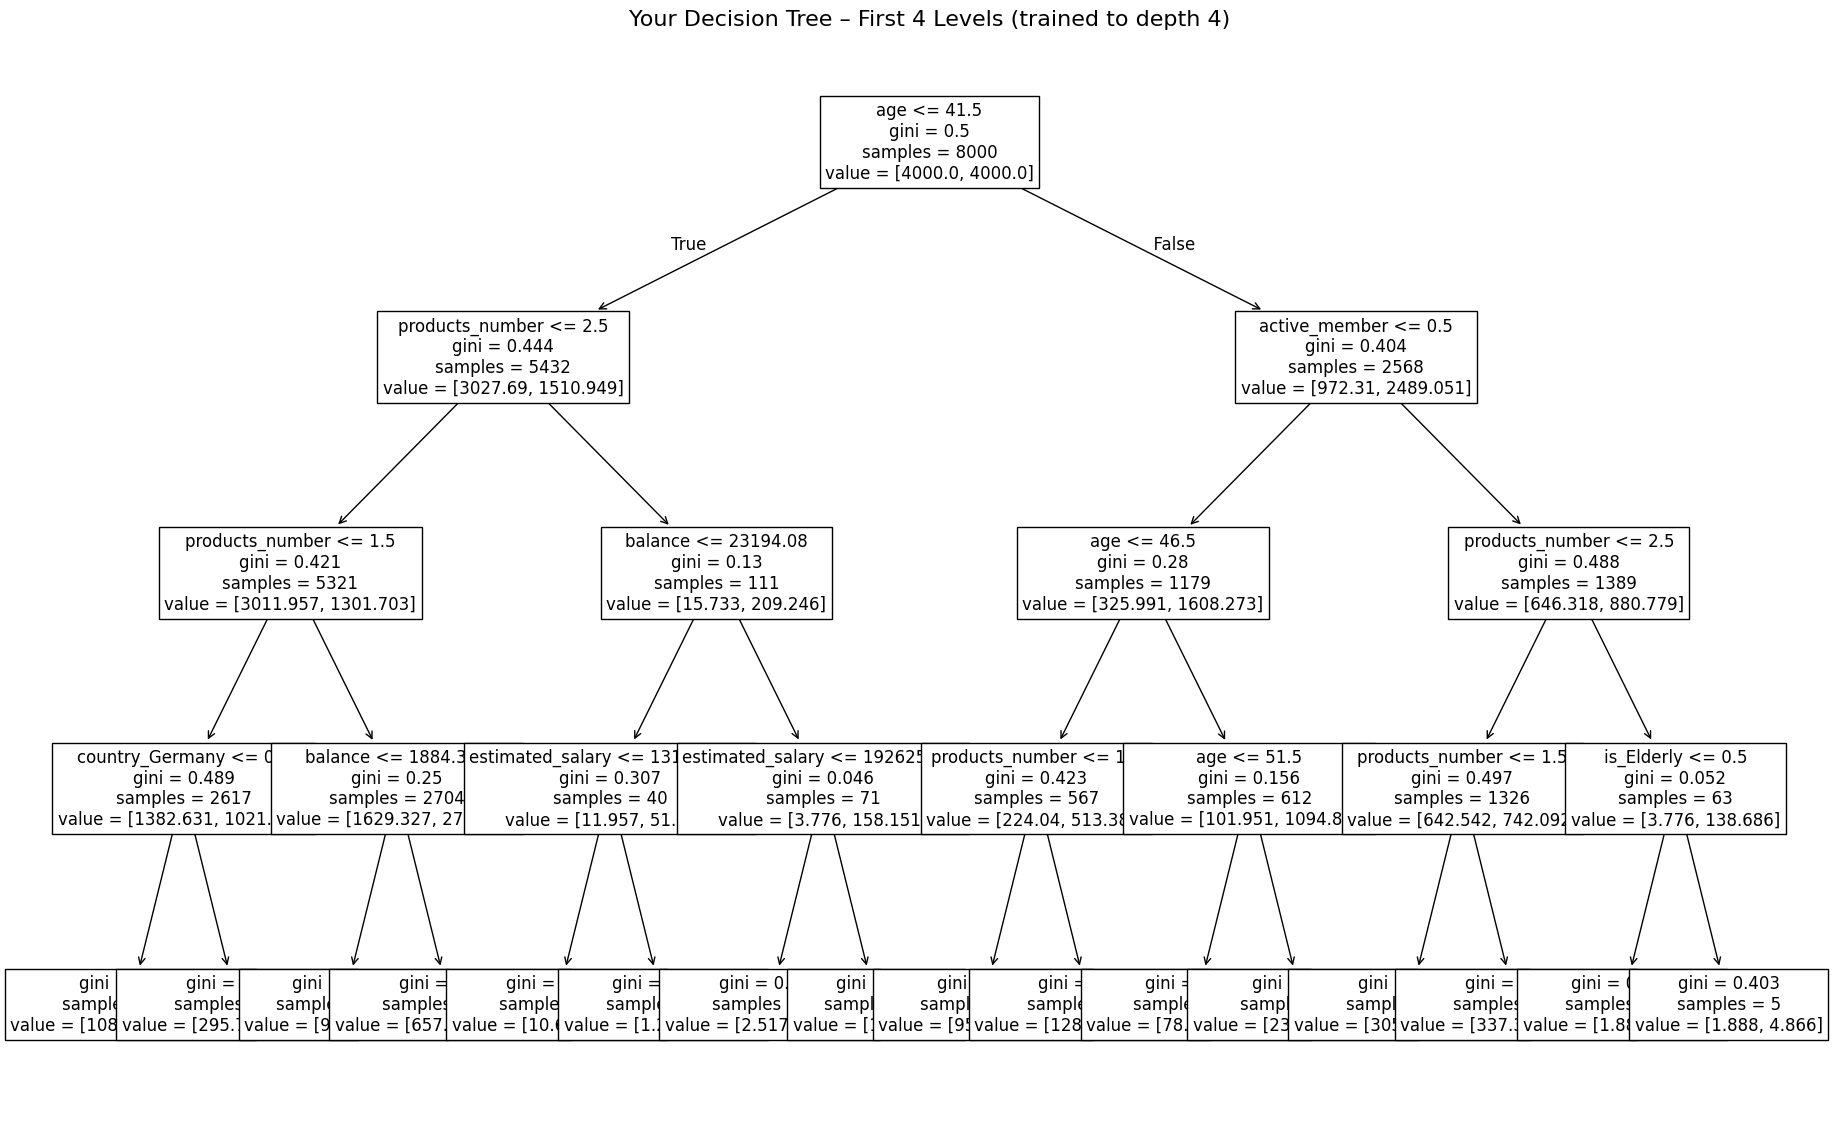

In [13]:
from sklearn.tree import plot_tree


plt.figure(figsize=(22, 14))
plot_tree(
    tree,
    fontsize=12,
    feature_names=X.columns,
    max_depth=4   # ← show only top 4 levels so it fits nicely
)
plt.title("Your Decision Tree – First 4 Levels (trained to depth 4)", fontsize=16)
plt.show()

In [14]:
#Naive Bayes classifier  (assume independency)
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train,y_train)

y_pred = NB.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1607
           1       0.46      0.13      0.20       393

    accuracy                           0.80      2000
   macro avg       0.64      0.55      0.54      2000
weighted avg       0.75      0.80      0.75      2000



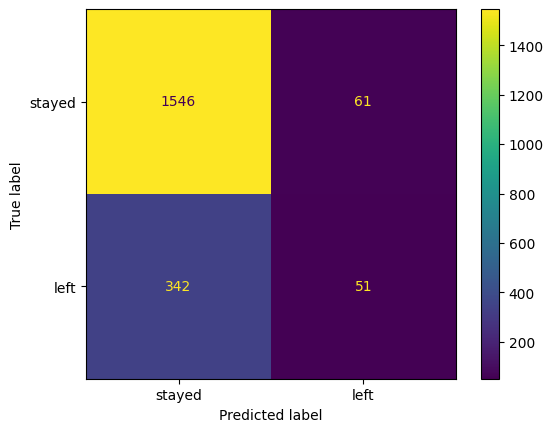

In [15]:
actual = y_test
predited = y_pred
confusion_mtx = metrics.confusion_matrix(actual, predited)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,display_labels=['stayed','left'])
cm_display.plot()

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Scale the data
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_ts_scaled = scaler.fit_transform(X_test)

# 2. Use better parameters
lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,  # More iterations
    C=0.1,  # Different regularization
    solver='liblinear',
    random_state=42
)
lr.fit(X_tr_scaled,y_train)
y_pred=lr.predict(X_ts_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1607
           1       0.40      0.72      0.51       393

    accuracy                           0.73      2000
   macro avg       0.65      0.73      0.66      2000
weighted avg       0.81      0.73      0.75      2000



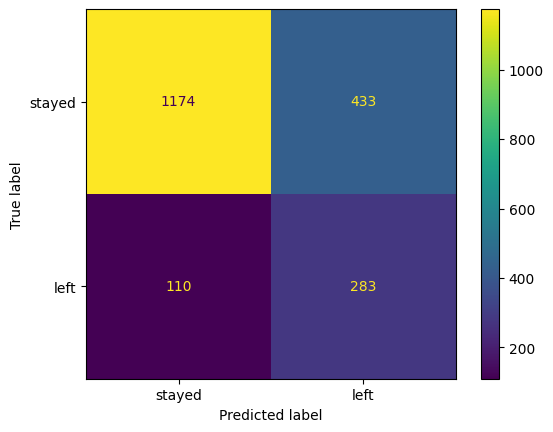

In [43]:
actual = y_test
predited = y_pred
confusion_mtx = metrics.confusion_matrix(actual, predited)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,display_labels=['stayed','left'])
cm_display.plot()